# **Load and Preprocess the Data**

In [1]:
import pandas as pd
import numpy as np

In [5]:
#load the dataset
df=pd.read_csv("train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# check the null/missing value is present or not
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
# replace null value with median in age column
df['Age'].fillna(df['Age'].median(),inplace=True)

In [10]:
# remove/drop unnessecery column
df.drop(columns=['Cabin'],inplace=True)

In [12]:
#  Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [13]:
# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


# **Ploting / Visualisation**

In [16]:
# import library
import seaborn as sns
import matplotlib.pyplot as plt


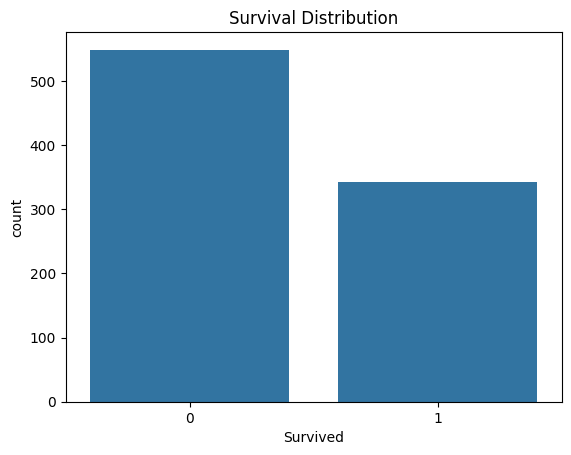

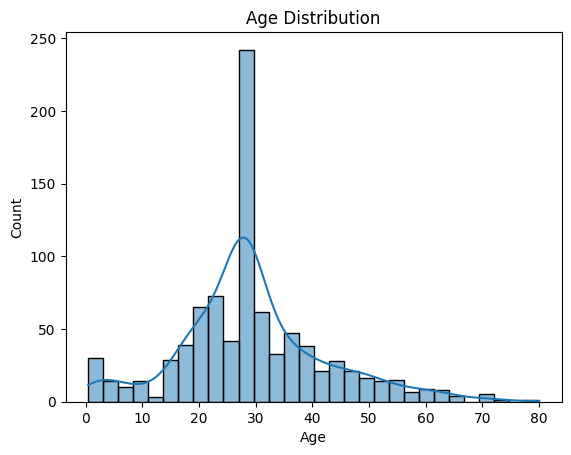

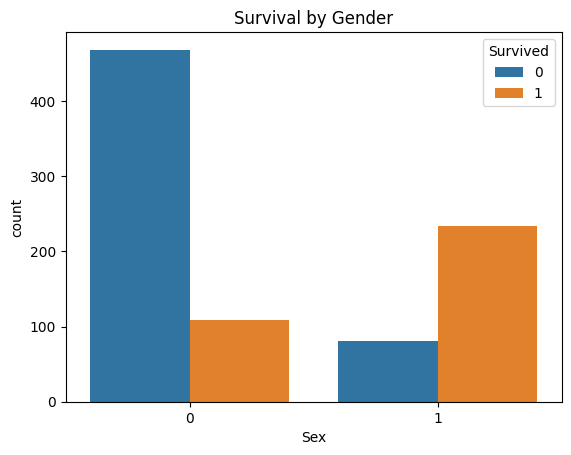

In [17]:
# Survival rate
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Survival by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

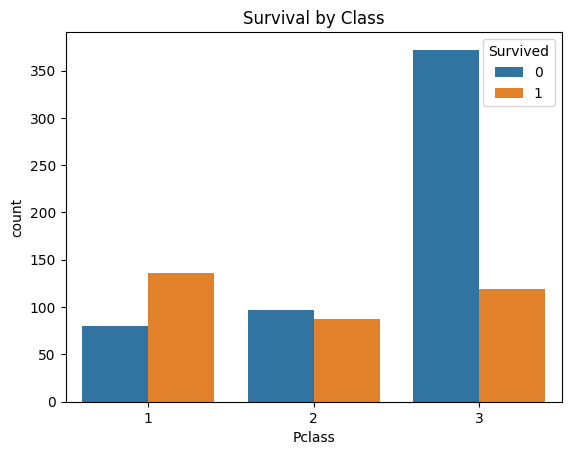

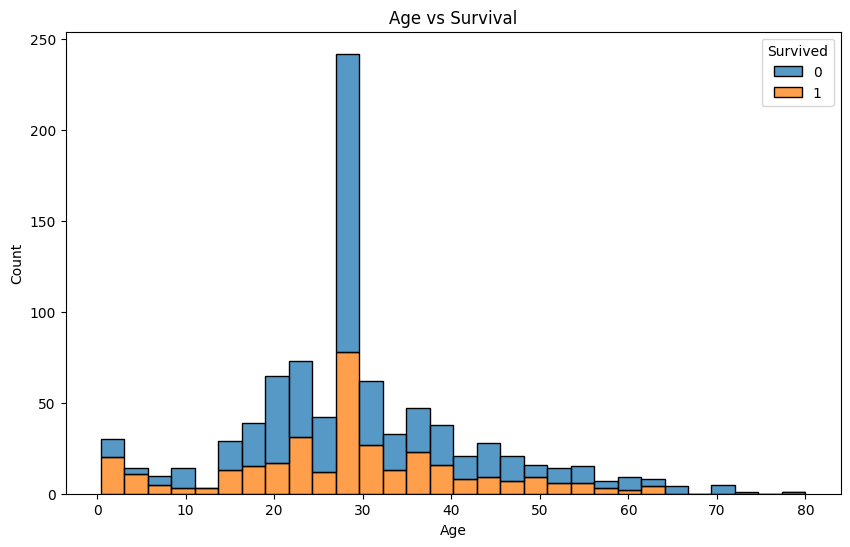

In [18]:
# Survival by class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Class')
plt.show()

# Age vs Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Age vs Survival')
plt.show()

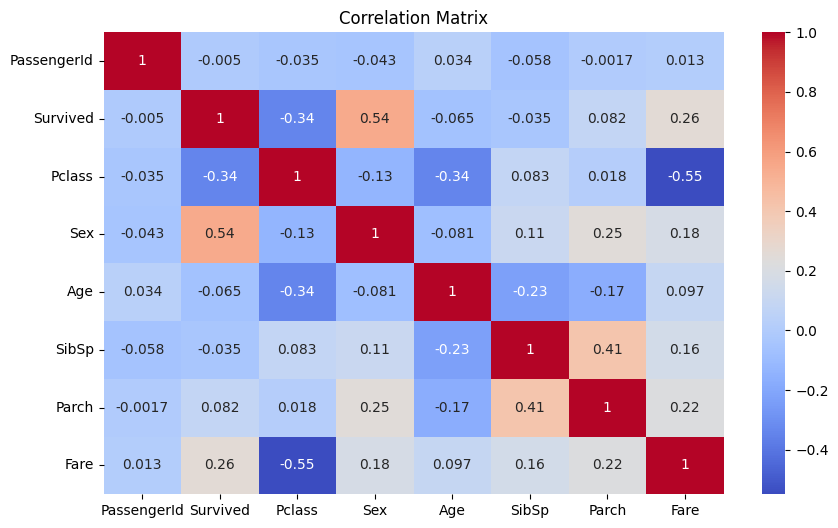

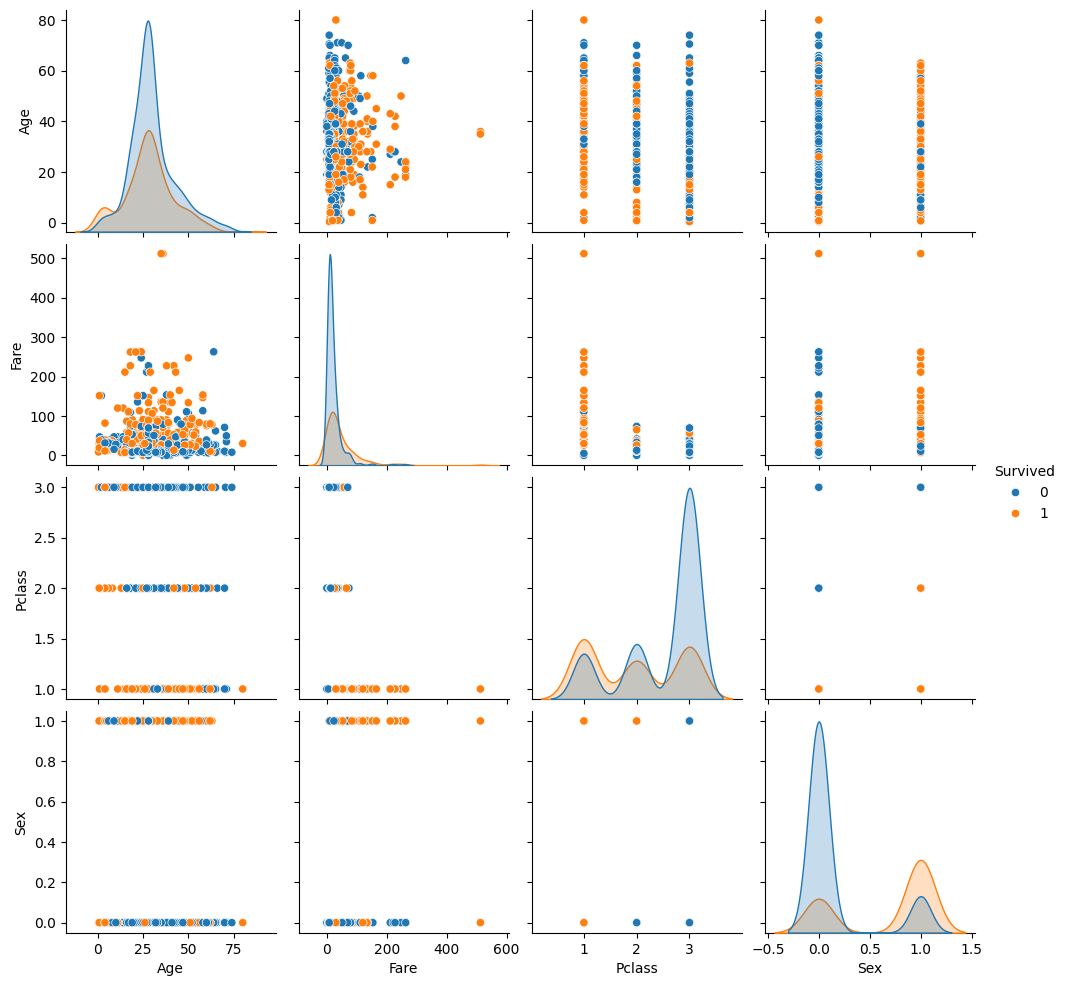

In [19]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'Pclass', 'Sex'])
plt.show()